In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

## Set up and basic information

In [11]:
# Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import numpy as np

# Display all data frame rows
pd.set_option('display.max_rows', None)

gme = yf.Ticker("GME")

# Get stock info (info -> very big, check for potentially important data)
gme_info = gme.info

# Lists of data to print
gme_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
gme_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$GME STOCK INFO")
print("--------------")

for i in range(len(gme_title_list)):
    print(gme_info_print[i] + ": " + str(gme_info[gme_title_list[i]]) + '\n')

$GME STOCK INFO
--------------
Name: GameStop Corporation

Symbol: GME

City: Grapevine

State: TX

Country: United States

Website: http://www.gamestop.com

Phone: 817 424 2000

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 14000

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as

# GME 

## Stock Stats - to do: after market

In [3]:
# Get historical market data
hist = gme.history(period="1mo")
clean_hist = hist.drop(['Dividends', 'Stock Splits'], axis=1)

difference = clean_hist['Close'] - clean_hist['Open']
difference.to_frame()

maxdifference = clean_hist['High'] - clean_hist['Low']
maxdifference.to_frame()

clean_hist = pd.concat([clean_hist,difference,maxdifference],axis=1)
clean_hist = clean_hist.rename(columns={0:"Daily Change",1:"Max Change"})
clean_hist

,Open,High,Low,Close,Volume,Daily Change,Max Change
Date,,,,,,,
2021-01-04,19.000000,19.100000,17.150000,17.250000,10022500,-1.750000,1.950001
2021-01-05,17.350000,18.080000,17.230000,17.370001,4961500,0.020000,0.850000
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200,1.020000,1.650000
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300,-0.389999,1.430000
2021-01-08,18.180000,18.299999,17.080000,17.690001,6464500,-0.490000,1.219999
2021-01-11,19.410000,20.650000,19.010000,19.940001,14927600,0.530001,1.639999
2021-01-12,19.959999,20.400000,19.320000,19.950001,7060700,-0.009998,1.080000
2021-01-13,20.420000,38.650002,20.030001,31.400000,144501700,10.980000,18.620001
2021-01-14,38.090000,43.060001,33.049999,39.910000,93717400,1.820000,10.010002


In [9]:
# Get stats
clean_hist.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
Open,21.0,96.6,121.2,17.3,19.4,38.5,96.7,379.7
High,21.0,120.6,148.3,18.1,20.4,43.1,158.0,483.0
Low,21.0,66.8,75.7,17.1,19.0,36.1,74.2,250.0
Close,21.0,87.0,101.7,17.2,19.9,39.4,90.0,347.5
Volume,21.0,65490939.3,61824537.9,4961500.0,10022500.0,50259200.0,93396700.0,196784300.0
Daily Change,21.0,-9.6,33.0,-91.6,-7.3,-0.4,1.8,59.4
Max Change,21.0,53.7,88.4,0.9,1.6,8.9,83.8,370.8


## Graphs

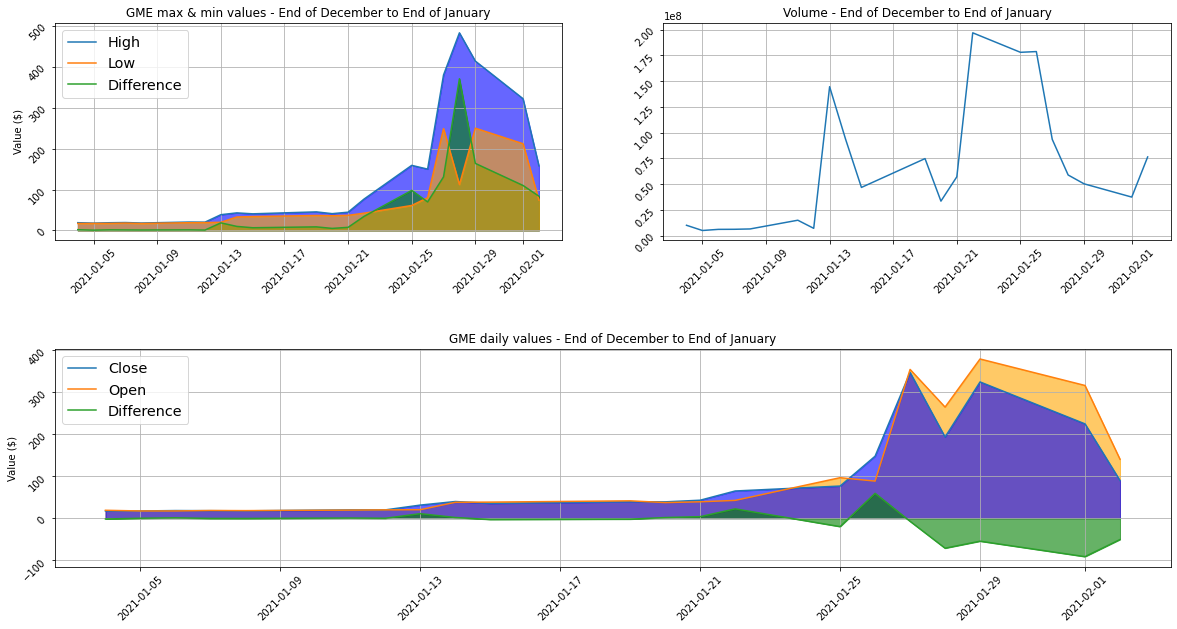

In [86]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.plot(clean_hist["High"],label="High")
ax1.plot(clean_hist["Low"],label="Low")
ax1.plot(clean_hist["Max Change"],label="Difference")
ax1.fill_between(clean_hist.index.tolist(),clean_hist["High"],0,color="blue",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["Max Change"],0,color="green",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["Low"],0,color="orange",alpha=0.6)

ax1.set_title("GME max & min values - End of December to End of January")
ax1.set(ylabel="Value ($)")
ax1.grid()
ax1.legend(fontsize='x-large')
ax1.tick_params(labelrotation=45)

ax2.plot(clean_hist["Volume"])
ax2.grid()
ax2.set_title("Volume - End of December to End of January")
ax2.tick_params(labelrotation=45)

ax3.plot(clean_hist["Close"],label="Close")
ax3.plot(clean_hist["Open"],label="Open")
ax3.plot(clean_hist["Daily Change"],label="Difference")
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Open"],0,color="orange",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Close"],0,color="blue",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Daily Change"],0,color="green",alpha=0.6)

ax3.grid()
ax3.set_title("GME daily values - End of December to End of January")
ax3.set(ylabel="Value ($)")
ax3.legend(fontsize='x-large')
ax3.tick_params(labelrotation=45)

In [69]:
# Get major holders
major_holder_df = gme.major_holders
major_holder_df

,0,1
0,27.33%,% of Shares Held by All Insider
1,122.04%,% of Shares Held by Institutions
2,167.96%,% of Float Held by Institutions
3,286,Number of Institutions Holding Shares


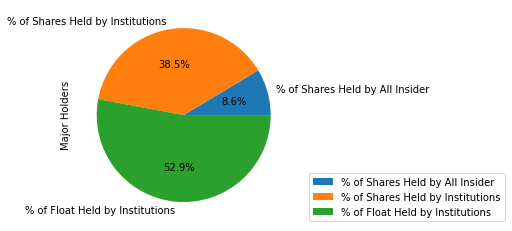

In [85]:
# Formatting
majorclean_df = major_holder_df.drop(3,axis=0)
majorclean_df = majorclean_df.rename(columns={0:'Major Holders'},index={0:majorclean_df[1][0],1:majorclean_df[1][1],2:majorclean_df[1][2]})
majorclean_df = majorclean_df.drop(1,axis=1)

# Drop % symbol but keep the rest of the str, then change dtype to float for plotting
majorclean_df['Major Holders'] = majorclean_df['Major Holders'].str.replace(r'%$','').astype('float')

# Pie plot
majorclean_df.plot.pie(y='Major Holders',autopct='%1.1f%%').legend(loc='lower right',bbox_to_anchor=(2.0, -0.01))
plt.show()

In [47]:
# Get institutions
institutions = gme.institutional_holders
institutions["Average share price"] = institutions["Value"]/institutions["Shares"]

institutions

,Holder,Shares,Date Reported,% Out,Value,Average share price
0,"FMR, LLC",9534090,2020-09-29,0.1367,97247718,10.20
1,Blackrock Inc.,8600507,2020-09-29,0.1233,87725171,10.20
2,"Vanguard Group, Inc. (The)",5288116,2020-09-29,0.0758,53938783,10.20
3,"Susquehanna International Group, LLP",4444128,2020-09-29,0.0637,45330105,10.20
4,Dimensional Fund Advisors LP,3948114,2020-09-29,0.0566,40270762,10.20
5,Senvest Management LLC,3225740,2020-09-29,0.0462,32902548,10.20
6,State Street Corporation,2609487,2020-09-29,0.0374,26616767,10.20
7,Morgan Stanley,1995842,2020-09-29,0.0286,20357588,10.20
8,"Paradice Investment Management, LLC",1832526,2020-09-29,0.0263,18691765,10.20
9,Norges Bank Investment Management,1811792,2019-12-30,0.0260,11015695,6.08


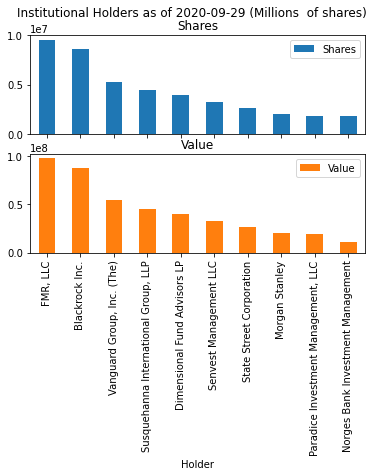

In [48]:
# Generate bar plot
institutions.plot.bar(x="Holder",y=["Shares","Value"],title="Institutional Holders as of 2020-09-29 (Millions  of shares)",subplots=True)
plt.show()

In [101]:
# Get firm's recommendations
recom_df = gme.recommendations

# Cutoff date
cutoff = "2020"

# Get dates after cutoff
clean_recom_df = recom_df.loc[recom_df.index >= cutoff]
clean_recom_df

,Firm,To Grade,From Grade,Action
Date,,,,
2020-03-20 11:33:42,Wedbush,Neutral,Outperform,down
2020-06-05 12:19:13,Credit Suisse,Underperform,,main
2020-09-08 16:17:15,Wedbush,Neutral,,main
2020-09-14 09:07:41,Jefferies,Buy,Hold,up
2020-09-14 10:29:57,Telsey Advisory Group,Outperform,Market Perform,up
2020-10-12 09:31:18,Jefferies,Hold,Buy,down
2021-01-25 12:59:56,Telsey Advisory Group,Underperform,Outperform,down
2021-01-27 13:56:33,B of A Securities,Underperform,,main


In [13]:
gme.calendar

,0,1
Earnings Date,2021-03-24 00:00:00,2021-03-29 00:00:00
Earnings Average,1.42,1.42
Earnings Low,0.84,0.84
Earnings High,1.83,1.83
Revenue Average,2293450000,2293450000
Revenue Low,2085220000,2085220000
Revenue High,2727000000,2727000000
